In [3]:
# Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
!ls

animation_from_CSV.ipynb  livelink_data


In [30]:
# CSV Import
take9 = pd.read_csv("livelink_data/MySlate_9_Vislabs_iPhone.csv", delimiter=',')
take15 = pd.read_csv("livelink_data/MySlate_15_Vislabs_iPhone.csv", delimiter=',')

print(take9.columns)
print(take9.JawRight)
print(len(take9))
EyeLeft = ['EyeBlinkLeft', 'EyeLookDownLeft', 'EyeLookInLeft', 'EyeLookOutLeft', 'EyeLookUpLeft', 'EyeSquintLeft', 
           'EyeWideLeft']
EyeRight = ['EyeBlinkRight', 'EyeLookDownRight', 'EyeLookInRight', 'EyeLookOutRight', 'EyeLookUpRight', 'EyeSquintRight',
            'EyeWideRight']
Brow = ['BrowDownLeft', 'BrowDownRight', 'BrowInnerUp', 'BrowOuterUpLeft', 'BrowOuterUpRight']
Nose = ['NoseSneerLeft', 'NoseSneerRight']
Mouth = ['MouthClose', 'MouthFunnel', 'MouthPucker', 'MouthRight', 'MouthLeft', 'MouthSmileLeft', 'MouthSmileRight', 
         'MouthFrownLeft', 'MouthFrownRight', 'MouthDimpleLeft', 'MouthDimpleRight', 'MouthStretchLeft', 
         'MouthStretchRight', 'MouthRollLower', 'MouthRollUpper', 'MouthShrugLower', 'MouthShrugUpper',
         'MouthPressLeft', 'MouthPressRight', 'MouthLowerDownLeft','MouthLowerDownRight', 'MouthUpperUpLeft', 
         'MouthUpperUpRight']
Jaw = ['JawForward', 'JawRight', 'JawLeft', 'JawOpen']
Cheeks = ['CheekPuff', 'CheekSquintLeft', 'CheekSquintRight']
Extra = ['TongueOut', 'HeadYaw', 'HeadPitch', 'HeadRoll', 'LeftEyeYaw', 'LeftEyePitch', 'LeftEyeRoll', 'RightEyeYaw', 
         'RightEyePitch', 'RightEyeRoll']

print(len(take9.columns) -2)
print(len(EyeLeft) + len(EyeRight) + len(Brow) + len(Nose) + len(Mouth) + len(Jaw) + len(Cheeks) + len(Extra))

Index(['Timecode', 'BlendShapeCount', 'EyeBlinkLeft', 'EyeLookDownLeft',
       'EyeLookInLeft', 'EyeLookOutLeft', 'EyeLookUpLeft', 'EyeSquintLeft',
       'EyeWideLeft', 'EyeBlinkRight', 'EyeLookDownRight', 'EyeLookInRight',
       'EyeLookOutRight', 'EyeLookUpRight', 'EyeSquintRight', 'EyeWideRight',
       'JawForward', 'JawRight', 'JawLeft', 'JawOpen', 'MouthClose',
       'MouthFunnel', 'MouthPucker', 'MouthRight', 'MouthLeft',
       'MouthSmileLeft', 'MouthSmileRight', 'MouthFrownLeft',
       'MouthFrownRight', 'MouthDimpleLeft', 'MouthDimpleRight',
       'MouthStretchLeft', 'MouthStretchRight', 'MouthRollLower',
       'MouthRollUpper', 'MouthShrugLower', 'MouthShrugUpper',
       'MouthPressLeft', 'MouthPressRight', 'MouthLowerDownLeft',
       'MouthLowerDownRight', 'MouthUpperUpLeft', 'MouthUpperUpRight',
       'BrowDownLeft', 'BrowDownRight', 'BrowInnerUp', 'BrowOuterUpLeft',
       'BrowOuterUpRight', 'CheekPuff', 'CheekSquintLeft', 'CheekSquintRight',
       'NoseSneer

In [28]:
Eyes = EyeLeft+EyeRight
print(take9[EyeLeft + EyeRight])

     EyeBlinkLeft  EyeLookDownLeft  EyeLookInLeft  EyeLookOutLeft  \
0        0.038548         0.127710       0.133504        0.000000   
1        0.038944         0.127782       0.131729        0.000000   
2        0.044992         0.130689       0.127154        0.000000   
3        0.046075         0.135750       0.124840        0.000000   
4        0.057208         0.157610       0.116196        0.000000   
..            ...              ...            ...             ...   
594      0.257649         0.460779       0.000000        0.192259   
595      0.261355         0.458952       0.000000        0.190388   
596      0.311953         0.457976       0.000000        0.195741   
597      0.278416         0.460295       0.000000        0.191743   
598      0.273319         0.457631       0.000000        0.189712   

     EyeLookUpLeft  EyeSquintLeft  EyeWideLeft  EyeBlinkRight  \
0              0.0       0.086187          0.0       0.038475   
1              0.0       0.086325        

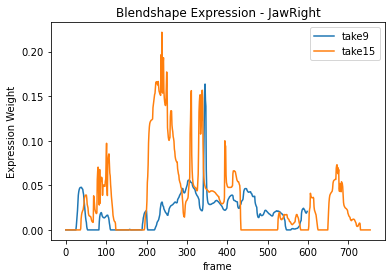

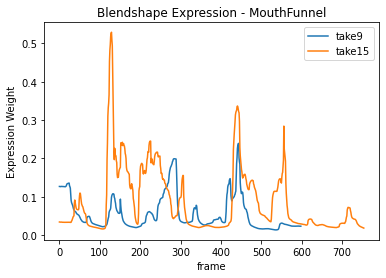

In [21]:
jr9 = take9.JawRight
jr15 = take15.JawRight
plt.plot(jr9, label="take9")
plt.plot(jr15, label="take15")
plt.ylabel("Expression Weight")
plt.xlabel("frame")
plt.title("Blendshape Expression - JawRight")
plt.legend()
plt.show()

mf9 = take9.MouthFunnel
mf15 = take15.MouthFunnel
plt.plot(mf9, label="take9")
plt.plot(mf15, label="take15")
plt.ylabel("Expression Weight")
plt.xlabel("frame")
plt.title("Blendshape Expression - MouthFunnel")
plt.legend()
plt.show()


In [33]:
def gen_animation(word, expression, duration=500):
    
    duration = len(take9[Mouth])
    zero_array = np.zeros((duration, 63))
    result = pd.DataFrame(zero_array, columns=take9.columns)
    if word == 'nine':
        mouth_cols = take9[Mouth]
    elif word == 'fifteen':
        mouth_cols = take15[Mouth]
        
    if expression == 'surprised':
        eye_cols = take9[EyeLeft+EyeRight]
    elif expression == 'angry':
        eye_cols = take15[EyeLeft+EyeRight]
        
    
    result[[Mouth]] = mouth_cols
    result[[EyeLeft+EyeRight]] = eye_cols         
    
    return result

frankenstein_anim = gen_animation('nine', 'surprised')

frankenstein_anim.to_csv('output/frankenstein.csv')

ValueError: Columns must be same length as key